In [29]:
import os
from io import open 

"""Writing the data per file into a dictionary for which the key is the category of news"""

import unicodedata
import string

all_letters = string.ascii_letters + ".,;'& "
n_letters = len(all_letters)

def unitoAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

def readFile_byline(filename):
    line_of_news = open("news_data_final/"+filename , encoding = 'utf-8').read().split('\n')    
    return [unitoAscii(line) for line in line_of_news]

In [30]:
category_news = {}
all_categories = []

list_of_files = os.listdir("news_data_final/")

#Dictionary which maps every category of news to it's description
for _file in list_of_files:
    category = _file.split(".")[0]
    all_categories.append(category)
    news_descp = readFile_byline(_file)
    category_news[category] = news_descp

num_categories = len(all_categories)
print(num_categories)

count_of_news_category = {}
average_words_per_number_of_samples = []

#Counting news items per category of news 
for key in category_news.keys():
    item = category_news.get(key)
    number_of_news_items = len(item)
    count_of_news_category[key] = number_of_news_items
    count_of_words = 0
    for sentence in item:
        count_of_words += len(sentence.split(" "))
    average_words_per_number_of_samples.append(count_of_words/number_of_news_items)

#print(count_of_news_category["WELLNESS"])
#print(category_news["CRIME"][0:2])
#print(average_words_per_number_of_samples)

29


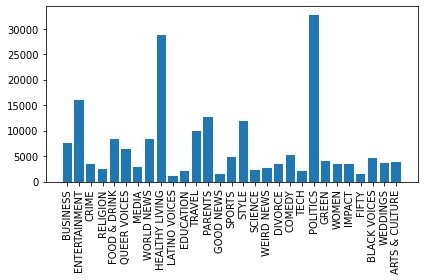

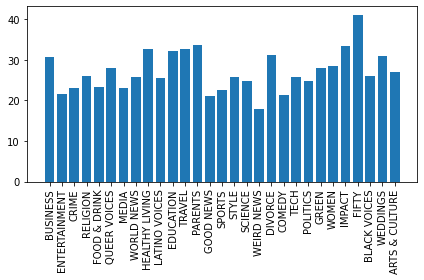

In [31]:
import random
import matplotlib
import matplotlib.pyplot as plt 

fig = plt.figure()
category = count_of_news_category.keys()
value = count_of_news_category.values()
plt.bar(category, value)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Number_of_articles_per_category.png')
plt.show()

fig1 = plt.figure()
category = count_of_news_category.keys()
value = average_words_per_number_of_samples
plt.bar(category, value)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Words_per_category.png')
plt.show()


In [32]:
import torch
import torch.nn as nn 
from torch import optim
import torch.nn.functional as F 

device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")
print(device)

def findIndexOfWordInSentence(sentence):
    indexOfWord = {}
    for index, word in enumerate(sentence):
        indexOfWord[word] = index
    return list(indexOfWord.values())

def sentenceToTensor(sentence):
    indexes = findIndexOfWordInSentence(sentence)
    return torch.tensor(indexes , dtype = torch.long, device = device).view(-1, 1)

category_plus_news_list = []

from nltk.corpus import stopwords

for key in category_news.keys():
    for news_item in category_news[key]:
        #news_item = [word for word in news_item.split(" ") if word not in stopwords.words('english')]
        #news_item = " ".join(word for word in news_item)
        category_plus_news_list.append((key, news_item))

print(category_plus_news_list[0])

def pairedTensor(pair):
    #pair is element in category_plus_news_list
    input_tensor = sentenceToTensor(pair[1])
    output_tensor = sentenceToTensor(pair[0])
    return (input_tensor, output_tensor)

#print(pairedTensor(category_plus_news_list[100]))

unique_words = []

'''for pair in category_plus_news_list:
    for word in pair[1].split(" "):
        if word.lower() not in unique_words:
            unique_words.append(word.lower())

print(unique_words[0:50])'''

cuda:2
('BUSINESS', 'U.S. Launches Auto Import Probe, China Vows To Defend Its Interests. The investigation could lead to new U.S. tariffs similar to those imposed on imported steel and aluminum in March.')


'for pair in category_plus_news_list:\n    for word in pair[1].split(" "):\n        if word.lower() not in unique_words:\n            unique_words.append(word.lower())\n\nprint(unique_words[0:50])'

In [33]:
list_of_sentences_business = []
list_of_sentences_politics = []
list_of_sentences_religion = []
list_of_sentences_food = []
list_of_sentences_home = []

list_of_sentences = []

labels =[]
count_of_lables=[]

for pair in category_plus_news_list:
    label = pair[0]
    sentences = pair[1]
    
    list_of_sentences.append(sentences)
    labels.append(label)
    '''for sentence in sentences:
        if len(sentence.split(" ")) >= 5:
            list_of_sentences.append(sentence)
            labels.append(label)'''
            
    
#print(list_of_sentences[0:20])
print(len(list_of_sentences))
#print((labels[0:20]))



200882


In [34]:
'''from sentence_transformers import SentenceTransformer
model = SentenceTransformer("paraphrase-distilroberta-base-v1", device = "cuda:2")
embeddings = model.encode(list_of_sentences)
#print(category_plus_news_list[0][1])
print(embeddings.shape)'''



'from sentence_transformers import SentenceTransformer\nmodel = SentenceTransformer("paraphrase-distilroberta-base-v1", device = "cuda:2")\nembeddings = model.encode(list_of_sentences)\n#print(category_plus_news_list[0][1])\nprint(embeddings.shape)'

In [35]:
label_list = list(category_news.keys())
index_class_map_dict1={}

for idx, value in enumerate(label_list):
    index_class_map_dict1[value]=idx

print(index_class_map_dict1)

{'BUSINESS': 0, 'ENTERTAINMENT': 1, 'CRIME': 2, 'RELIGION': 3, 'FOOD & DRINK': 4, 'QUEER VOICES': 5, 'MEDIA': 6, 'WORLD NEWS': 7, 'HEALTHY LIVING': 8, 'LATINO VOICES': 9, 'EDUCATION': 10, 'TRAVEL': 11, 'PARENTS': 12, 'GOOD NEWS': 13, 'SPORTS': 14, 'STYLE': 15, 'SCIENCE': 16, 'WEIRD NEWS': 17, 'DIVORCE': 18, 'COMEDY': 19, 'TECH': 20, 'POLITICS': 21, 'GREEN': 22, 'WOMEN': 23, 'IMPACT': 24, 'FIFTY': 25, 'BLACK VOICES': 26, 'WEDDINGS': 27, 'ARTS & CULTURE': 28}


In [36]:
number_labels=[]

for label in labels:
    number_labels.append(index_class_map_dict1[label])

In [37]:
import torch
torch.manual_seed(0)

import numpy as np
np.random.seed(0)

import random
random.seed(0)

In [38]:
from sklearn.model_selection import train_test_split

train_texts = list_of_sentences
train_labels = number_labels

train_texts, val_texts, train_labels, val_labels = train_test_split(train_texts, train_labels, test_size=.2)


print(len(train_texts))
print(len(train_labels))
print(len(val_texts))

160705
160705
40177


In [39]:
from transformers import DistilBertTokenizerFast
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

train_encodings = tokenizer(train_texts, return_tensors='pt', truncation=True, padding=True)
val_encodings = tokenizer(val_texts, return_tensors='pt', truncation=True, padding=True)
print(train_encodings.keys())

dict_keys(['input_ids', 'attention_mask'])


In [40]:
class newsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: (val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = newsDataset(train_encodings, train_labels)
#print((train_dataset).__getitem__(3))
val_dataset = newsDataset(val_encodings, val_labels)


In [41]:
from torch.utils.data import DataLoader
from transformers import DistilBertForSequenceClassification, AdamW
from torch.nn import functional as F
import torch.nn
from tqdm import tqdm

device = torch.device('cuda:2') if torch.cuda.is_available() else torch.device('cpu')

model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased',num_labels = 29)
model.to(device)

no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]
optimizer = AdamW(optimizer_grouped_parameters, lr=1e-5)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=True)

num_of_items_per_class = [7645, 16059, 3406, 2557, 8323, 6315, 2816, 8421, 28717, 1130, 2149, 9888, 12633, 1399, 4885, 11904, 2179, 2671, 3427, 5176, 2083, 32740, 3946, 3491, 3460, 1402, 4529, 3652, 3879]
weights = []
for i in num_of_items_per_class:
    weights.append(1/i)
    
class_weights = torch.FloatTensor(weights).to(device)

train_losses = []
train_acc = []
val_losses = []
val_acc = []
running_loss = 0
running_acc = 0


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classi

In [42]:
for epoch in tqdm(range(10)):
    model.train()
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model(input_ids, attention_mask=attention_mask)
        loss = F.cross_entropy(outputs.logits, labels, class_weights)
        accuracy = (outputs.logits.argmax(-1) == labels).float().sum()
        running_acc += accuracy.item()
        running_loss += loss.item()
        loss.backward()
        optimizer.step()
    
    print("train_loss for epoch = {epoch}".format(epoch = epoch + 1 ), "is", running_loss/len(train_loader))
    train_losses.append(running_loss/len(train_loader))
    running_loss = 0
    
    print("train_acc for epoch = {epoch}".format(epoch = epoch + 1), "is", running_acc/len(train_texts))
    train_acc.append(running_acc/len(train_texts))
    running_acc = 0
    
    
    if epoch%1 == 0: 
        model.eval()
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(input_ids, attention_mask=attention_mask)
            loss = F.cross_entropy(outputs.logits, labels, class_weights)
            running_loss += loss.item()
            accuracy = (outputs.logits.argmax(-1) == labels).float().sum()
            running_acc += accuracy.item()
            
    print("val_loss for epoch = {epoch}".format(epoch = epoch + 1), "is", running_loss/len(val_loader))
    val_losses.append(running_loss/len(val_loader))
    running_loss = 0
    print("val_acc for epoch = {epoch}".format(epoch = epoch + 1), "is", running_acc/len(val_texts))
    val_acc.append(running_acc/len(val_texts))
    running_acc = 0
            
    

  0%|          | 0/10 [00:00<?, ?it/s]

train_loss for epoch = 1 is 1.5119578680910835
train_acc for epoch = 1 is 0.6030552876388413


 10%|█         | 1/10 [46:13<6:56:03, 2773.73s/it]

val_loss for epoch = 1 is 1.2074505736507108
val_acc for epoch = 1 is 0.6521641735321204
train_loss for epoch = 2 is 1.0462759515193638
train_acc for epoch = 2 is 0.6838866245605302


 20%|██        | 2/10 [1:32:30<6:10:04, 2775.57s/it]

val_loss for epoch = 2 is 1.143662913929327
val_acc for epoch = 2 is 0.6839485277646414
train_loss for epoch = 3 is 0.822712897744091
train_acc for epoch = 3 is 0.7304439812078031


 30%|███       | 3/10 [2:18:39<5:23:26, 2772.41s/it]

val_loss for epoch = 3 is 1.166490364330376
val_acc for epoch = 3 is 0.6705328919531075
train_loss for epoch = 4 is 0.6400564721997339
train_acc for epoch = 4 is 0.7705547431629383


 40%|████      | 4/10 [3:04:58<4:37:30, 2775.01s/it]

val_loss for epoch = 4 is 1.2356770110137132
val_acc for epoch = 4 is 0.6856410384050576
train_loss for epoch = 5 is 0.4867078820591159
train_acc for epoch = 5 is 0.8092965371332566


 50%|█████     | 5/10 [3:51:09<3:51:08, 2773.77s/it]

val_loss for epoch = 5 is 1.3160068237765508
val_acc for epoch = 5 is 0.6829529332702791
train_loss for epoch = 6 is 0.36776406236258075
train_acc for epoch = 6 is 0.842475343019819


 60%|██████    | 6/10 [4:37:29<3:05:03, 2775.82s/it]

val_loss for epoch = 6 is 1.482181797128847
val_acc for epoch = 6 is 0.6866864126241382
train_loss for epoch = 7 is 0.28688307277052333
train_acc for epoch = 7 is 0.8661833794841479


 70%|███████   | 7/10 [5:23:43<2:18:45, 2775.11s/it]

val_loss for epoch = 7 is 1.6687609854602987
val_acc for epoch = 7 is 0.7011972023794708
train_loss for epoch = 8 is 0.22400879796535045
train_acc for epoch = 8 is 0.8881739833857067


 80%|████████  | 8/10 [6:09:58<1:32:30, 2775.17s/it]

val_loss for epoch = 8 is 1.7377639704659746
val_acc for epoch = 8 is 0.6971401548149438
train_loss for epoch = 9 is 0.18360521449834816
train_acc for epoch = 9 is 0.9038797797206061


 90%|█████████ | 9/10 [6:56:13<46:14, 2774.98s/it]  

val_loss for epoch = 9 is 1.9428029465919159
val_acc for epoch = 9 is 0.7038106379271722
train_loss for epoch = 10 is 0.15030835435147208
train_acc for epoch = 10 is 0.9179925951277185


100%|██████████| 10/10 [7:42:33<00:00, 2775.32s/it]

val_loss for epoch = 10 is 2.011143872365326
val_acc for epoch = 10 is 0.7049306817333301


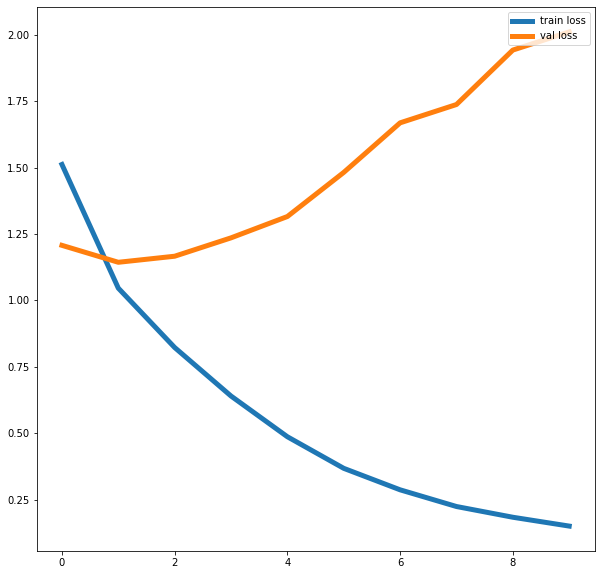

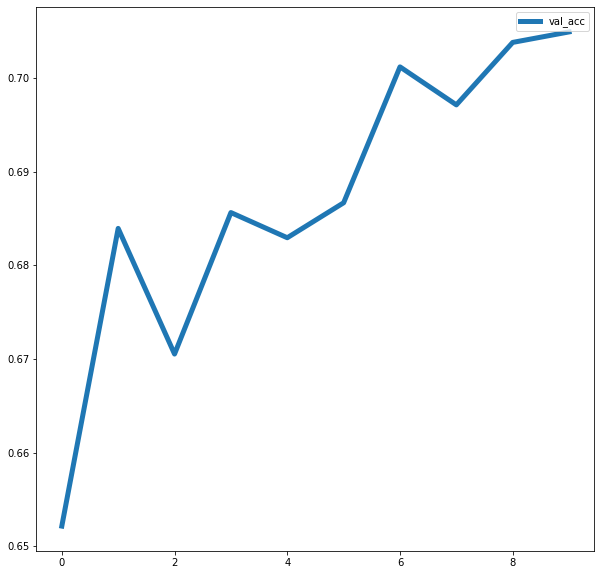

In [45]:
import matplotlib.pyplot as plt
plt.switch_backend('agg')
import matplotlib.ticker as ticker
import numpy as np

epochs =[]

for i in range(10):
    epochs.append(i)

plt.figure(figsize=(10,10))
plt.plot(epochs, train_losses, linewidth=5)
plt.plot(epochs, val_losses, linewidth=5)
plt.legend(['train loss', 'val loss'], loc = 'upper right')
plt.savefig('loss-bert.png')
plt.show()

plt.figure(figsize=(10,10))
plt.plot(epochs, val_acc, linewidth =5)
plt.legend(['val_acc'], loc = 'upper right')
plt.savefig('acc-bert.png')
plt.show()

f = open("values.txt",'a')
for i in range(len(epochs)):
    
    f.write("train_loss for epoch = {epoch}".format(epoch = epochs[i]+1) + " is " + str(train_losses[i]) + "\n")
    f.write("train_acc for epoch = {epoch}".format(epoch = epochs[i]+1) + " is " + str(train_acc[i]) + "\n")
    f.write("val_loss for epoch = {epoch}".format(epoch = epochs[i]+1) + " is " + str(val_losses[i]) + "\n")
    f.write("val_acc for epoch = {epoch}".format(epoch = epochs[i]+1) + " is " + str(val_acc[i]) + "\n")
f.close()
    
    

In [56]:
import os

path = os.getcwd()
os.rmdir("bert_model")
os.mkdir("bert_model")

folder = "bert_model"
FILE = "model.pth"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)

torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss
            }, path_save)